<a href="https://colab.research.google.com/github/SilvioCesarTeixeira/PJI4_RandomForest/blob/master/RandomForest_PJI4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Instalar Bibliotecas

In [ ]:
#!pip install openpyxl
!pip install pyexcel
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Importar pacotes

In [ ]:
import pandas as pd
import numpy as np
import openpyxl
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


##Referenciar base de dados existente na rede

In [ ]:
url_SG = r'https://github.com/SilvioCesarTeixeira/PJI4/raw/master/SRAG_SubP_SP.xlsx'
url_QA = r'https://github.com/SilvioCesarTeixeira/PJI4/raw/master/Santana_SP_AQI.xlsx'

##Criar Dataframes

In [ ]:
df1 = pd.read_excel(url_QA, engine='openpyxl')
df2 = pd.read_excel(url_SG, engine='openpyxl')


Definir a linha zero do dataframe 1 como título das colunas

In [ ]:
df1.columns = df1.iloc[0]
df1 = df1.reindex(df1.index.drop(0))

Definindo a primeira coluna como data com padrão Português do Brasil

In [ ]:
df_QA = df1
df_QA['Data'] = pd.to_datetime(df1['date'], format='%Y/%m/%d').dt.strftime('%d/%m/%Y')
col_Data_Brasil = df_QA.iloc[:, -1]
df_QA = df_QA.iloc[:, 1:-1]
df_QA.insert(loc=0, column='Data', value=col_Data_Brasil)
df_QA

,Data,pm25,pm10,o3,no2,so2,co
1,08/03/2023,35,,24,,,
2,09/03/2023,47,,2,,,
3,10/03/2023,50,,18,,,
4,11/03/2023,52,,23,,,
5,12/03/2023,37,,14,,,
...,...,...,...,...,...,...,...
3267,24/11/2014,,,24,,,
3268,25/11/2014,,,28,,,
3269,01/01/2014,,,22,,,
3270,10/02/2019,,,,9,,


Remover linhas desnecessárias e renomear coluna do dataframe 2

In [ ]:
df_SRAG = df2
df_SRAG.columns = df_SRAG.iloc[2]
linhas_remover = list(range(0,3)) + list(range(1164,1168))
df_SRAG = df_SRAG.reindex(df_SRAG.index.drop(linhas_remover))
df_SRAG = df_SRAG.rename(columns={'Ano M�s Dia Notifica��o': 'Data'})
df_SRAG

2,Data,ARICANDUVA/FORMOSA/CARRAO,BUTANTA,CAMPO LIMPO,CAPELA DO SOCORRO,CASA VERDE/CACHOEIRINHA,CIDADE ADEMAR,CIDADE TIRADENTES,ERMELINO MATARAZZO,FREGUESIA/BRASILANDIA,...,SAO MATEUS,SAO MIGUEL,SAPOPEMBA,SE,VILA MARIA/VILA GUILHERME,VILA MARIANA,VILA PRUDENTE,N�o localizado,Localizado fora do MSP,Total
3,01/01/2020,-,1,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,2
4,02/01/2020,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,4
5,03/01/2020,-,-,2,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,3
6,05/01/2020,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,2
7,06/01/2020,-,1,1,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159,12/03/2023,-,-,3,-,-,1,-,1,-,...,-,1,-,2,1,1,1,3,-,21
1160,13/03/2023,2,1,8,3,2,-,-,-,7,...,2,1,2,6,2,10,-,2,-,94
1161,14/03/2023,1,5,13,2,-,3,-,2,1,...,-,-,2,6,5,8,2,1,-,91
1162,15/03/2023,5,7,1,1,1,1,-,-,3,...,2,1,3,1,2,2,1,4,-,82


In [ ]:
df_SRAG.describe()

2,Data,ARICANDUVA/FORMOSA/CARRAO,BUTANTA,CAMPO LIMPO,CAPELA DO SOCORRO,CASA VERDE/CACHOEIRINHA,CIDADE ADEMAR,CIDADE TIRADENTES,ERMELINO MATARAZZO,FREGUESIA/BRASILANDIA,...,SAO MATEUS,SAO MIGUEL,SAPOPEMBA,SE,VILA MARIA/VILA GUILHERME,VILA MARIANA,VILA PRUDENTE,N�o localizado,Localizado fora do MSP,Total
count,1161,1161,1161,1161,1161,1161,1161,1161,1161,1161,...,1161,1161,1161,1161,1161,1161,1161,1161,1161,1161
unique,1161,37,41,56,58,36,43,22,25,42,...,45,42,36,54,41,41,33,43,6,541
top,01/01/2020,-,1,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,1
freq,1,171,112,69,121,166,135,330,280,134,...,148,174,189,83,169,115,175,124,1065,11


##Juntar os dois dataframes, mas mantendo apenas as datas que coincidem

In [ ]:
df_SRAG = df_SRAG.loc[:, ['Data', 'VILA MARIA/VILA GUILHERME']]
df_base = pd.merge(df_QA, df_SRAG, how='inner', on='Data')

##Definir uma data de corte

In [ ]:
data_limite = '01/06/2021'
df_base['Data'] = pd.to_datetime(df_base['Data'], format='%d/%m/%Y')
df_base = df_base.loc[df_base['Data'] > data_limite]

Renomear colunas com titulo extenso e converter strings em tipos numericos

In [ ]:
df_base = df_base.rename(columns={' pm25':'PM25',' o3':'O3','VILA MARIA/VILA GUILHERME': 'VM_SRAG'})
df_base['PM25'] = pd.to_numeric(df_base['PM25'], errors='coerce')
df_base[' pm10'] = pd.to_numeric(df_base[' pm10'], errors='coerce')
df_base['O3'] = pd.to_numeric(df_base['O3'], errors='coerce')
df_base[' no2'] = pd.to_numeric(df_base[' no2'], errors='coerce')
df_base['VM_SRAG'] = pd.to_numeric(df_base['VM_SRAG'], errors='coerce')

In [ ]:
df_base.describe()

,PM25,pm10,O3,no2,VM_SRAG
count,696.000000,0.0,755.000000,0.0,658.000000
mean,52.252874,NaN,25.000000,NaN,6.721884
std,23.168246,NaN,11.020718,NaN,6.909736
min,5.000000,NaN,1.000000,NaN,1.000000
25%,36.000000,NaN,17.000000,NaN,2.000000
50%,49.000000,NaN,24.000000,NaN,4.000000
75%,64.000000,NaN,32.000000,NaN,9.000000
max,245.000000,NaN,73.000000,NaN,48.000000


Definir um dataframe base apenas com as colunas que contenham dados em quase todas as linhas

In [ ]:
df_base = df_base.loc[:, ['Data', 'PM25', 'O3','VM_SRAG']]

In [ ]:
df_base

,Data,PM25,O3,VM_SRAG
0,2023-03-08,35.0,24.0,3.0
1,2023-03-09,47.0,2.0,NaN
2,2023-03-10,50.0,18.0,NaN
3,2023-03-11,52.0,23.0,2.0
4,2023-03-12,37.0,14.0,1.0
...,...,...,...,...
1098,2021-06-21,NaN,13.0,17.0
1099,2021-06-29,NaN,11.0,11.0
1100,2021-02-22,NaN,30.0,15.0
1101,2021-03-01,NaN,26.0,20.0


##Preencher os valores NaN (não numéricos) com a média de cada variável

In [ ]:
df_base['PM25'].fillna(value=df_base['PM25'].mean(), inplace=True)
df_base['O3'].fillna(value=df_base['O3'].mean(), inplace=True)
df_base['VM_SRAG'].fillna(value=df_base['VM_SRAG'].mean(), inplace=True)

In [ ]:
# Substituir NaN pela mediana
#mediana = df['Atributo1'].median()
#df['Atributo1'].fillna(mediana, inplace=True)

# Substituir NaN pela moda
#moda = df['Atributo1'].mode()[0] # O método mode() retorna uma série, pegamos o primeiro elemento
#df['Atributo1'].fillna(moda, inplace=True)

In [ ]:
df_base.describe()

,PM25,O3,VM_SRAG
count,767.000000,767.000000,767.000000
mean,52.252874,25.000000,6.721884
std,22.068416,10.934053,6.399260
min,5.000000,1.000000,1.000000
25%,37.000000,17.000000,2.000000
50%,51.000000,24.000000,5.000000
75%,62.000000,31.000000,8.000000
max,245.000000,73.000000,48.000000


In [ ]:
df_base.info()

# definir função de normalização de logaritmo
#def normalizar_df_com_log(x):
    #return np.log(x) / np.max(np.log(x))

# aplicar a função de normalização as colunas PM25, O3 e VM_SRAG
#df_base['PM25'] = df_base['PM25'].apply(normalizar_df_com_log)
#df_base['O3'] = df_base['O3'].apply(normalizar_df_com_log)
#df_base['VM_SRAG'] = df_base['VM_SRAG'].apply(normalizar_df_com_log)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 767 entries, 0 to 1102
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Data     767 non-null    datetime64[ns]
 1   PM25     767 non-null    float64       
 2   O3       767 non-null    float64       
 3   VM_SRAG  767 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 30.0 KB


In [ ]:
df_corr = df_base
df_corr['Dias'] = (pd.to_datetime(df_corr['Data']) - pd.to_datetime('1900-01-01')).dt.days
df_corr = df_corr.drop(['Data'], axis = 1)
df_corr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 767 entries, 0 to 1102
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PM25     767 non-null    float64
 1   O3       767 non-null    float64
 2   VM_SRAG  767 non-null    float64
 3   Dias     767 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 30.0 KB


Gerar uma matriz de correlação entre as variáveis do dataframe base

In [ ]:
corr_matriz1 = df_corr.corr()

##Plotar o Mapa de Calor com as correlações calculadas

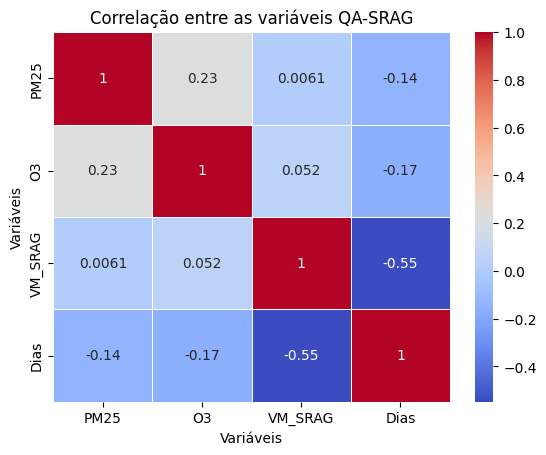

In [ ]:
sns.heatmap(corr_matriz1, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlação entre as variáveis QA-SRAG')
plt.xlabel('Variáveis')
plt.ylabel('Variáveis')
plt.show()

Plotar gráfico com dados do dataframe ao longo dos anos de 2020 a 2023.

In [ ]:
df_base['Data'] = pd.to_datetime(df_base['Data'], format='%d/%m/%Y')

In [ ]:
df_base = df_base.sort_values(['Data'], ascending=True)
print(df_base)
df_base.describe()

          Data  PM25    O3    VM_SRAG   Dias
625 2021-01-07  36.0  27.0   8.000000  44201
626 2021-01-08  23.0  25.0  10.000000  44202
627 2021-01-09  35.0  27.0  14.000000  44203
628 2021-01-10  54.0  26.0   6.000000  44204
629 2021-01-11  44.0  31.0  20.000000  44205
..         ...   ...   ...        ...    ...
4   2023-03-12  37.0  14.0   1.000000  44995
5   2023-03-13  31.0  13.0   2.000000  44996
6   2023-03-14  40.0  17.0   5.000000  44997
7   2023-03-15  51.0  21.0   2.000000  44998
8   2023-03-16  44.0  30.0   6.721884  44999

[767 rows x 5 columns]


,PM25,O3,VM_SRAG,Dias
count,767.000000,767.000000,767.000000,767.000000
mean,52.252874,25.000000,6.721884,44603.036506
std,22.068416,10.934053,6.399260,227.333392
min,5.000000,1.000000,1.000000,44201.000000
25%,37.000000,17.000000,2.000000,44411.500000
50%,51.000000,24.000000,5.000000,44606.000000
75%,62.000000,31.000000,8.000000,44798.500000
max,245.000000,73.000000,48.000000,44999.000000


In [ ]:
df_VMSRAG = df_base.groupby([df_base['Data'].dt.year, df_base['Data'].dt.month, df_base['Data'].dt.day])['VM_SRAG'].sum()

In [ ]:
df_PM25 = df_base.groupby([df_base['Data'].dt.year, df_base['Data'].dt.month, df_base['Data'].dt.day])['PM25'].sum()

In [ ]:
df_O3 = df_base.groupby([df_base['Data'].dt.year, df_base['Data'].dt.month, df_base['Data'].dt.day])['O3'].sum()

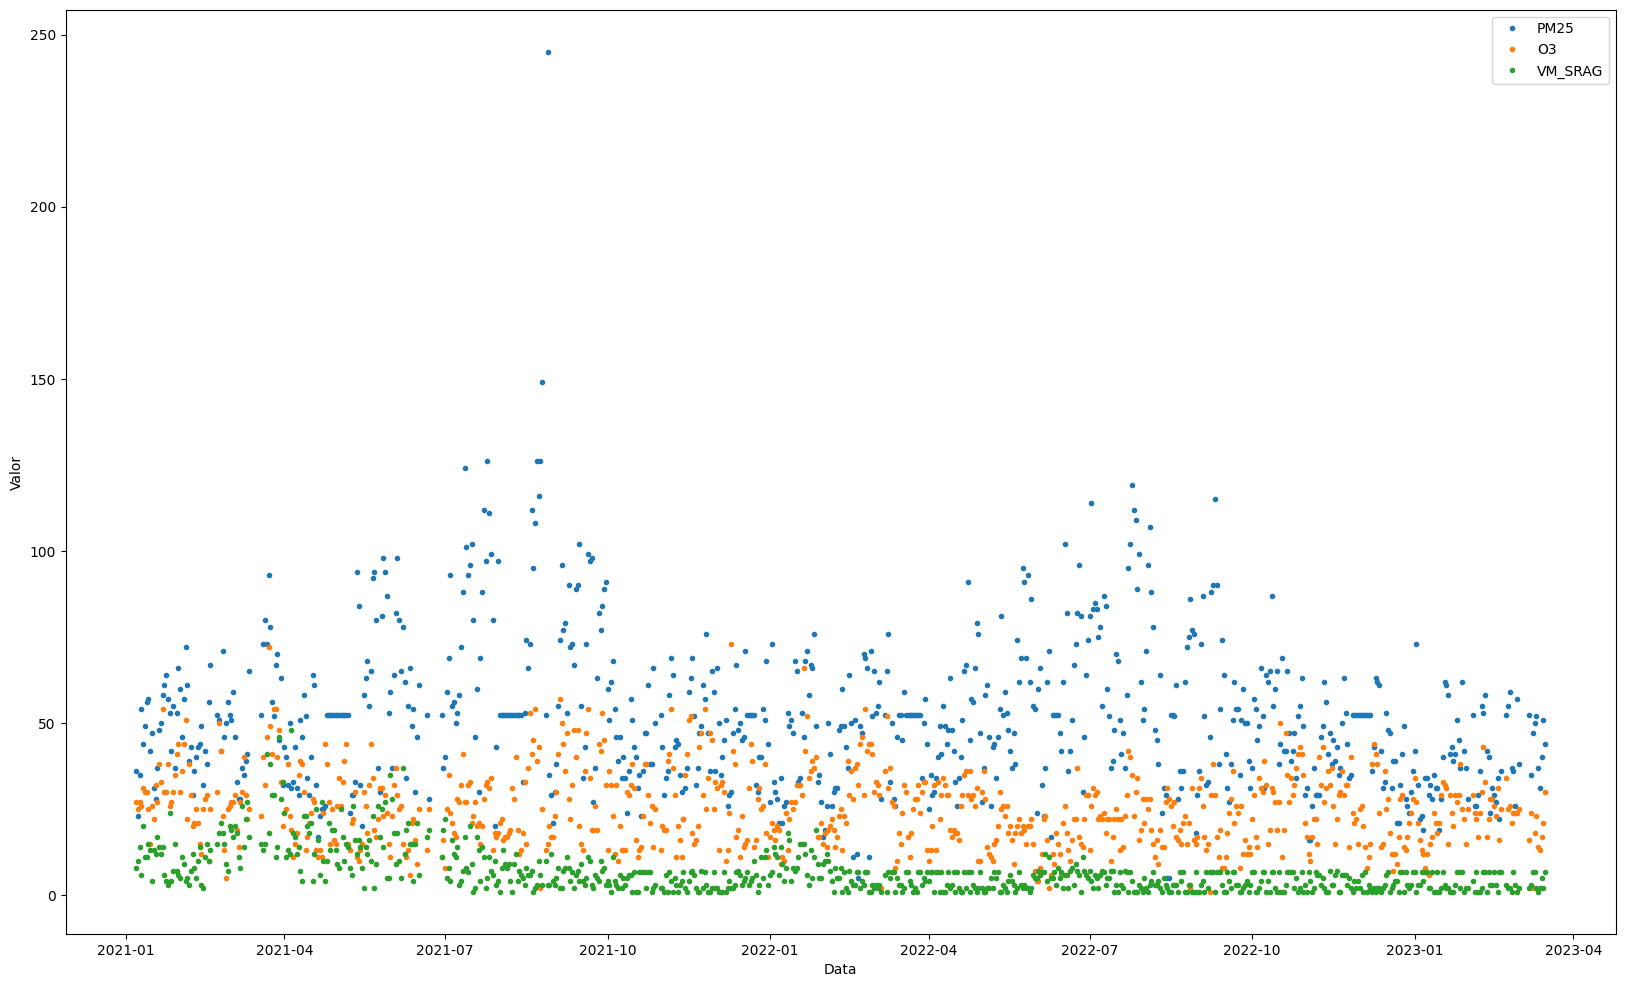

In [ ]:
plt.figure(figsize=(20, 12))
plt.plot(df_base['Data'], df_base['PM25'], label='PM25', marker='.', linestyle='None')
plt.plot(df_base['Data'], df_base['O3'], label='O3', marker='.', linestyle='None')
plt.plot(df_base['Data'], df_base['VM_SRAG'], label='VM_SRAG', marker='.', linestyle='None')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.legend()
plt.show()

Ajustando um dataframe ordenado por ano, com a soma de todos os casos por mês

In [ ]:
df_base_mmAAAA = df_base.groupby([df_base['Data'].dt.year, df_base['Data'].dt.month])['VM_SRAG'].sum()

In [ ]:
df_base_mmAAAA

Data  Data
2021  1       270.000000
      2       250.000000
      3       549.000000
      4       484.000000
      5       446.000000
      6       319.000000
      7       276.721884
      8       183.000000
      9       173.721884
      10      121.053191
      11      104.609422
      12      141.165653
2022  1       304.721884
      2       138.609422
      3       114.775076
      4       112.662614
      5        94.165653
      6       183.887538
      7       123.887538
      8        91.887538
      9       111.218845
      10      117.662614
      11      112.443769
      12       99.331307
2023  1       107.218845
      2        85.775076
      3        39.165653
Name: VM_SRAG, dtype: float64

##Plotando gráfico de internação por mês/ano

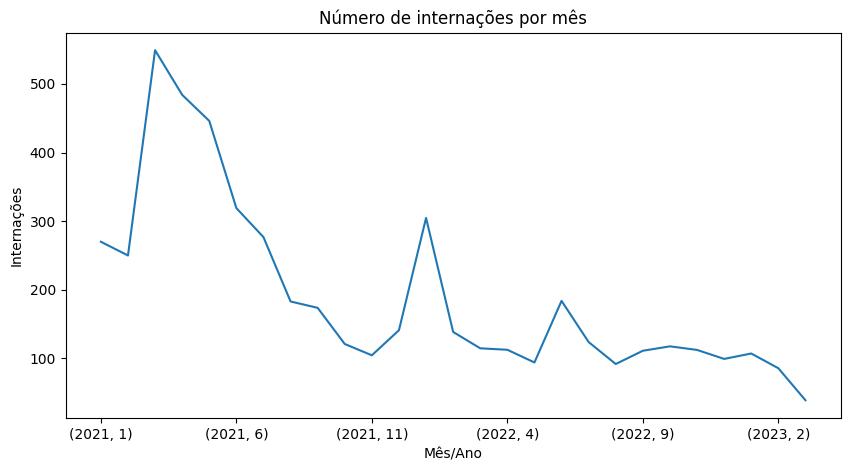

In [ ]:
df_base_mmAAAA.plot(kind='line', figsize=(10, 5))
plt.title('Número de internações por mês')
plt.xlabel('Mês/Ano')
plt.ylabel('Internações')
plt.show()

##Separação Treino/Validação/Teste

##Criar um dataframe apenas com a coluna VM_SRAG, sem normalização

In [ ]:
df_base

,Data,PM25,O3,VM_SRAG,Dias
625,2021-01-07,36.0,27.0,8.000000,44201
626,2021-01-08,23.0,25.0,10.000000,44202
627,2021-01-09,35.0,27.0,14.000000,44203
628,2021-01-10,54.0,26.0,6.000000,44204
629,2021-01-11,44.0,31.0,20.000000,44205
...,...,...,...,...,...
4,2023-03-12,37.0,14.0,1.000000,44995
5,2023-03-13,31.0,13.0,2.000000,44996
6,2023-03-14,40.0,17.0,5.000000,44997
7,2023-03-15,51.0,21.0,2.000000,44998


In [ ]:
# Utilizar dataframe
Y = df_base.drop(['Data','PM25','O3','Dias'], axis = 1)
Y

,VM_SRAG
625,8.000000
626,10.000000
627,14.000000
628,6.000000
629,20.000000
...,...
4,1.000000
5,2.000000
6,5.000000
7,2.000000


In [ ]:
# Utilizar Dataframe
X = df_base.drop(['VM_SRAG', 'Data'], axis=1)
X

,PM25,O3,Dias
625,36.0,27.0,44201
626,23.0,25.0,44202
627,35.0,27.0,44203
628,54.0,26.0,44204
629,44.0,31.0,44205
...,...,...,...
4,37.0,14.0,44995
5,31.0,13.0,44996
6,40.0,17.0,44997
7,51.0,21.0,44998


In [ ]:
# Converter a coluna de datas para um formato adequado (se necessário)
#X['Data'] = pd.to_datetime(X['Data'])

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Instanciar e treinar o modelo Random Forest
model = RandomForestRegressor()
y_train = y_train['VM_SRAG'].values.ravel()
model.fit(X_train, y_train)

# Fazer previsões com o conjunto de teste
y_pred = model.predict(X_test)

# Avaliar o desempenho do modelo usando a métrica de erro quadrático médio (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('RMSE:', rmse)

# Avaliar o desempenho do modelo usando a métrica de erro absoluto médio (MAE)
mae = mean_absolute_error(y_test, y_pred)
print('MAE', mae)

# Avaliar o desempenho do modelo usando a métrica de erro quadrático médio (R2)
r2 = r2_score(y_test, y_pred)
print('R2:', r2)


RMSE: 5.878287204487867
MAE 3.775174969407491
R2: 0.39976511561655115


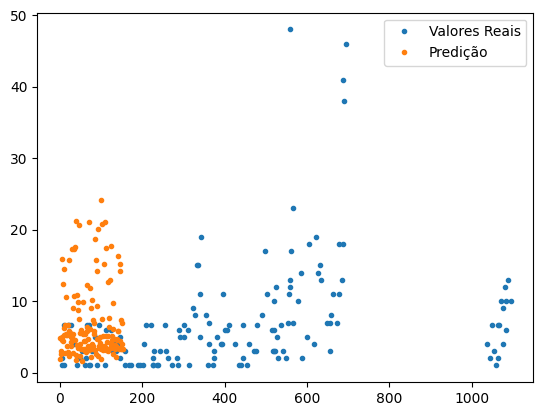

In [ ]:
plt.plot(y_test, label='Valores Reais', marker='.', linestyle='None')
plt.plot(y_pred, label='Predição', marker='.', linestyle='None')
plt.legend()
plt.show()

# Salvar o modelo Treinado

In [ ]:
with open('modelo_random_forest.pkl', 'wb') as file:
    pickle.dump(model, file)

In [ ]:
pip freeze > requirements.txt

In [ ]:
# Carregar o modelo treinado
with open('modelo_random_forest.pkl', 'rb') as file:
    model = pickle.load(file)

# Carregar os dados de teste
data_test = pd.read_excel('/content/sample_data/Random_test.xlsx')  # Substitua pelo nome do seu arquivo de dados de teste

# Separar as features (X) e o target (y)
X_test = data_test.drop('VM_SRAG', axis=1)
y_test = data_test['VM_SRAG']

# Fazer a predição com o modelo
y_pred = model.predict(X_test)

# Comparar as predições com os valores reais
df_results = pd.DataFrame({'Real': y_test, 'Predito': y_pred})
print(df_results)

          Real    Predito
0     6.721884   5.808632
1     2.000000   3.333252
2     5.000000   4.908815
3     2.000000   4.467097
4     1.000000   4.024909
..         ...        ...
762  20.000000  16.320000
763   6.000000   7.930000
764  14.000000   9.740000
765  10.000000   9.170000
766   8.000000   9.500000

[767 rows x 2 columns]


In [ ]:
y_pred

array([ 5.80863222,  3.33325228,  4.90881459,  4.46709726,  4.02490881,
        2.87993921,  5.51419453,  5.89306991,  3.0149696 ,  2.35331307,
        2.66106383,  1.51887538,  2.82721884,  3.0343769 ,  1.88218845,
        2.54940729,  2.34331307,  3.7343769 ,  5.00200608,  3.12272036,
        2.17384498,  3.09887538,  3.03775076,  3.16218845,  3.03887538,
        5.27419453,  2.48159574,  5.44975684,  5.31366261,  3.1543769 ,
        2.08828267,  2.05828267,  2.15609422,  2.23721884,  4.17272036,
        2.26609422,  2.44053191,  1.52775076,  4.90478723,  2.32218845,
        5.37975684,  5.91306991,  3.3087538 ,  1.32887538,  1.45887538,
        2.38325228,  3.30047112,  3.17106383,  3.38828267,  5.44141337,
        2.58662614,  2.13828267,  4.94644377,  3.64822188,  2.29715805,
        5.00366261,  2.9943769 ,  3.42047112,  6.17082067,  5.87472644,
        5.24922492,  5.68863222,  3.22828267,  2.99053191,  2.30550152,
        5.91916413,  5.93638298,  2.99609422,  2.33887538,  2.54

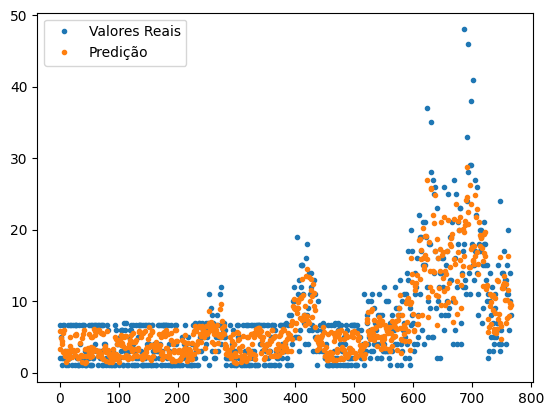

In [ ]:
plt.plot(y_test, label='Valores Reais', marker='.', linestyle='None')
plt.plot(y_pred, label='Predição', marker='.', linestyle='None')
plt.legend()
plt.show()